# Final Team Project

## Samantha Colbert-Neal - Solo Project

Jupyter Notebook with Python code

The Jupyter Notebook must be organized like a report where the code blocks are interspersed with text blocks. The text block that appears before the code block must cover the explanations of the approach. The text blocks that follow the output graphs and tables must contain inference, actionable insight, and recommendations. The code blocks themselves must be annotated with comments so they are readable. Here is an entire textbook as Google Colab Notebooks: Python Data Science HandbookLinks to an external site.. Here is another textbook for Jupyter Notebooks: Computational and Inferential Thinking: The Foundations of Data ScienceLinks to an external site..

The notebook must contain the following sections:

Problem statement and justification for the proposed approach.
- Data understanding (EDA) – a graphical and non-graphical representation of relationships between the response variable and predictor variables.
- Data preparation & Feature engineering – data pre-processing – missing values, outliers, etc.
- Feature Selection – how were the features selected based on the data analysis?
- Modeling – selection, comparison, tuning, and analysis – consider ensembles.
- Evaluation – performance measures, results, and conclusions.
- Deployment - A discussion of either the hypothetical deployment of the model or the actual deployment of the model if it has been deployed.
- Discussion and conclusions – address the problem statement and recommendation.

Please use the naming convention Final Project Section# Team Number (e.g., Final Project SectionX-Team 1.ipynb) and include a link to your GitHub code and provide access to the instructor(s).

Github link: https://github.com/scolbertneal/Predicting-Digital-Ad-Campaign-Effectiveness

## 🧠 Problem Statement and Justification

The objective of this project is to improve conversion rates in digital marketing campaigns targeting Healthcare Professionals (HCPs). As a Digital Marketing Specialist at Kenvue, understanding which campaign characteristics lead to successful conversions can help inform strategy, optimize spend, and personalize future outreach.

By analyzing campaign metadata such as ad spend, click-through rates, time on site, social shares, and more, we aim to predict whether a customer will convert (binary target) and identify key drivers of that conversion. This supports smarter budget allocation and campaign refinement in real time.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

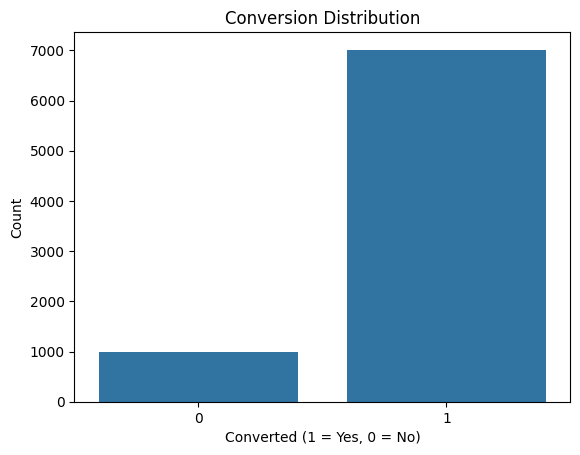

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("digital_marketing_campaign_dataset.csv")
# Check data structure and types
print(df.info())

# Basic stats
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize target variable distribution
sns.countplot(data=df, x="Conversion")
plt.title("Conversion Distribution")
plt.xlabel("Converted (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


**Summary:**

The dataset contains variables related to user demographics, campaign type, engagement metrics, and conversion outcomes. There are no null values, and the target variable (`Conversion`) is relatively balanced, which is beneficial for modeling. We'll explore relationships between predictors and the target to guide preprocessing and feature selection.

## **Data Understanding (EDA)**

### Summary

In this section, I’ll explore the dataset to understand the variables, identify patterns, spot potential outliers, and assess the relationships between features and the target variable, which is `Conversion`. I’ll start by analyzing data types, checking for missing values, and visualizing distributions for key features. This helps guide our data cleaning and modeling decisions.

### Basic EDA – Data Types, Nulls, Summary Stats

In [16]:
# Check data types and nulls
df.info()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


### Distribution Plots for Key Numeric Variables

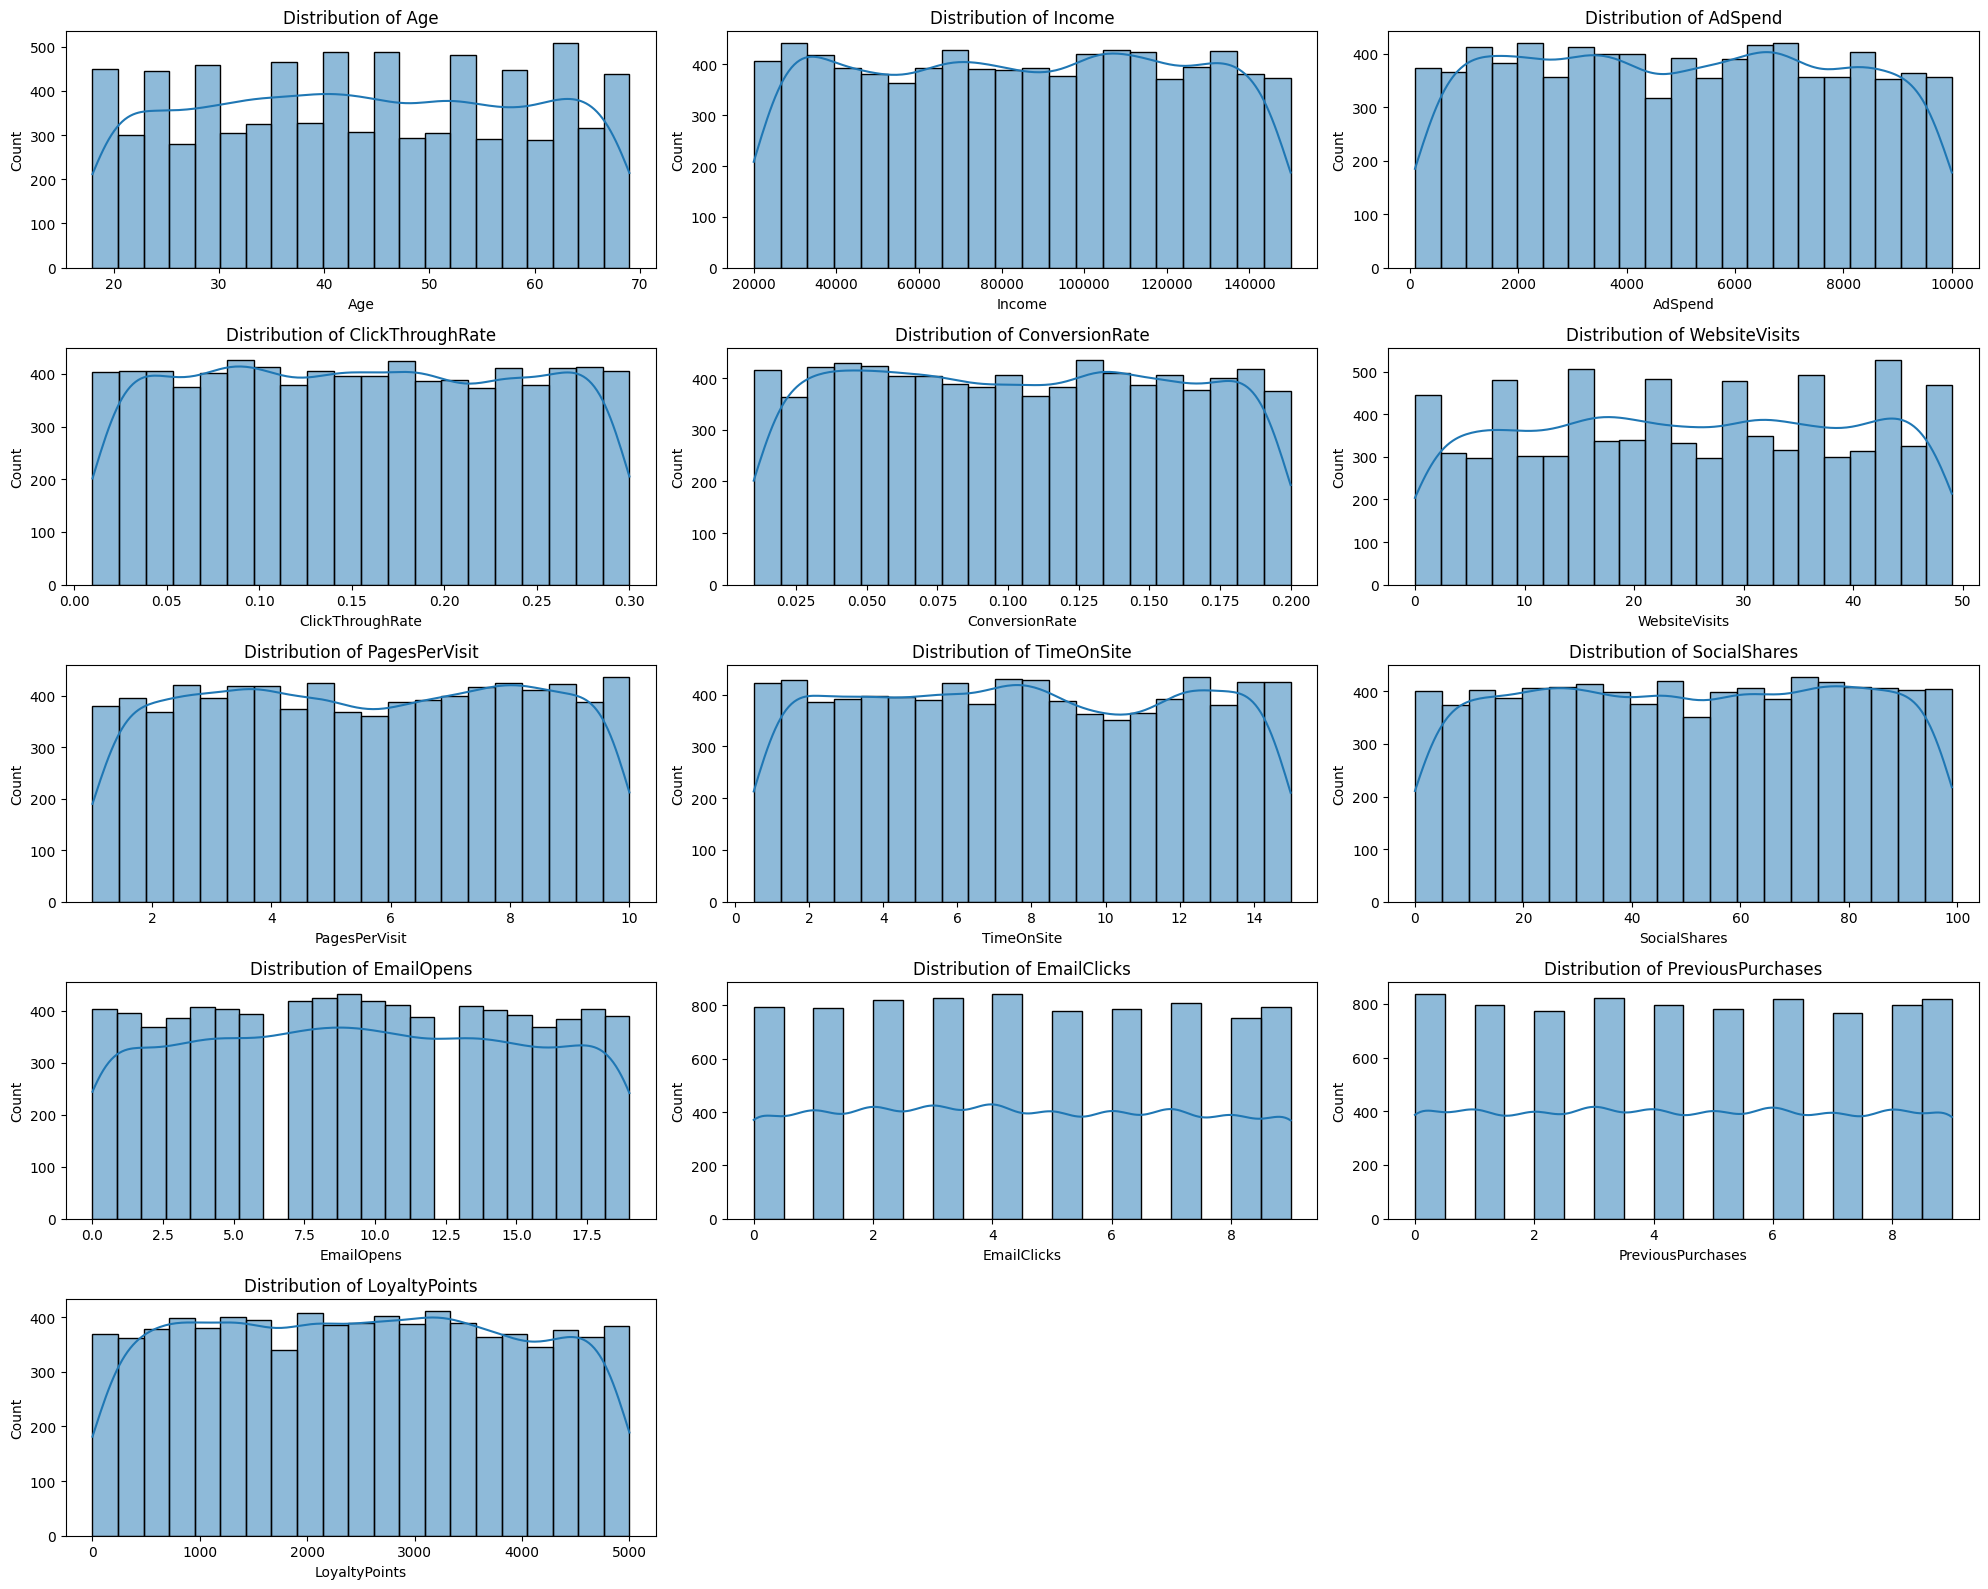

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 
                'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 
                'TimeOnSite', 'SocialShares', 'EmailOpens', 
                'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']

# Plot distributions
plt.figure(figsize=(20, 16))
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Correlation Heatmap

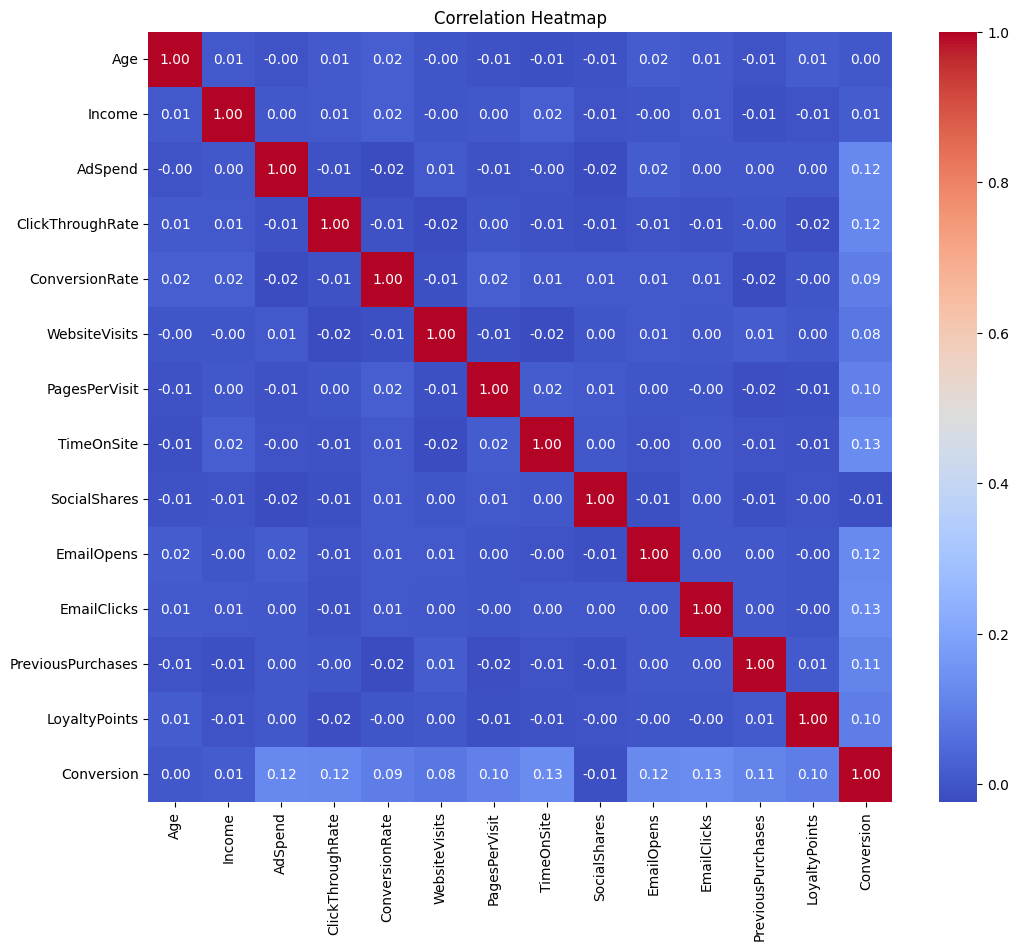

In [21]:
# Compute correlation matrix and plot
plt.figure(figsize=(12, 10))
corr_matrix = df[numeric_cols + ['Conversion']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Data Preparation & Feature Engineering
### Summary

In this section, I’ll clean and prepare the data for modeling. This includes handling missing values, encoding categorical variables (like Gender, DeviceType, Region, etc.), and scaling numeric features to ensure models perform optimally. I’ll also create any new features if needed and split the data into training and test sets.

### Handle Missing Values (if any)

In [75]:
# Drop rows with missing values for simplicity
df_cleaned = df.dropna()

# Confirm no more missing values
df_cleaned.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

### Encode Categorical Variables

In [29]:
# Use one-hot encoding for categorical features
df_encoded = pd.get_dummies(df_cleaned, columns=[
    'Gender', 'CampaignChannel', 'CampaignType', 
    'AdvertisingPlatform', 'AdvertisingTool'
], drop_first=True)

# Confirm new columns
df_encoded.head()


,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,...,LoyaltyPoints,Conversion,Gender_Male,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,8000,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,...,688,1,False,False,False,False,True,False,False,False
1,8001,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,...,3459,1,True,False,False,False,False,False,False,True
2,8002,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,...,2337,1,False,True,False,False,False,False,False,False
3,8003,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,...,2463,1,False,True,False,False,False,False,True,False
4,8004,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,...,4345,1,False,True,False,False,False,False,True,False


### Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

# Identify numeric features to scale
features_to_scale = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 
                     'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 
                     'TimeOnSite', 'SocialShares', 'EmailOpens', 
                     'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']

scaler = StandardScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

### Train-Test Split

In [35]:
from sklearn.model_selection import train_test_split

# Define target and features
X = df_encoded.drop('Conversion', axis=1)
y = df_encoded['Conversion']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (6400, 22)
Test shape: (1600, 22)


## Feature Selection

### Summary
Here, I’ll identify the most influential features that contribute to predicting Conversion. This helps reduce dimensionality, avoid overfitting, and improve model interpretability. I’ll use feature importance from a tree-based model (like Random Forest) and also show correlation heatmaps to back up feature relevance.

### Feature Importance with Random Forest

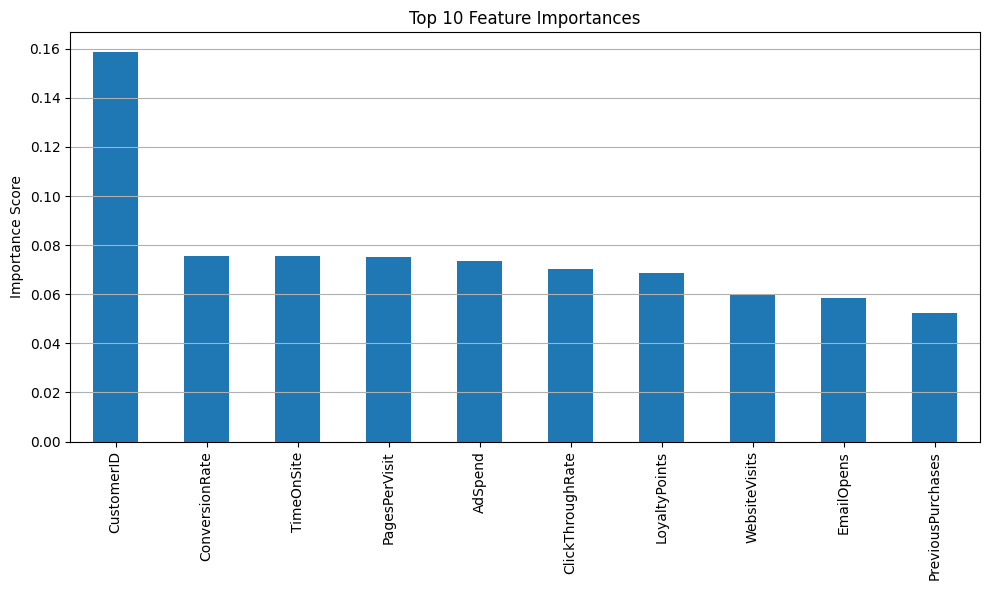

In [39]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Fit Random Forest to evaluate feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Visualize top 10 features
plt.figure(figsize=(10, 6))
importances.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance Score")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Correlation Heatmap for Top Features

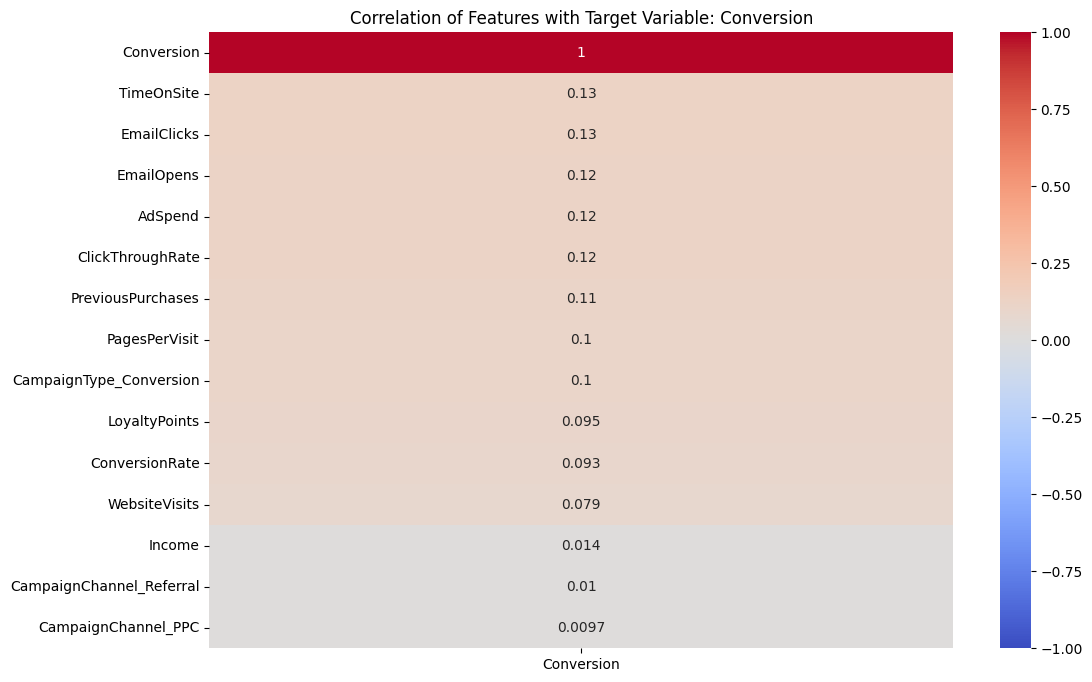

In [41]:
import seaborn as sns

# Combine features and target
df_corr = df_encoded.copy()
df_corr['Conversion'] = y

# Compute correlation matrix
corr = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['Conversion']].sort_values(by='Conversion', ascending=False).head(15), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with Target Variable: Conversion")
plt.show()

## Modeling – Selection, Comparison, Tuning, and Analysis
### Summary

In this step, I’ll test and compare several classification models to predict whether a user converts (Conversion = 1). I’ll begin with Logistic Regression as a baseline, then evaluate Random Forest, Gradient Boosting (using XGBoost), and a Voting Ensemble. I’ll use cross-validation and accuracy, precision, recall, and F1 score as my key metrics.

### Model Training & Evaluation Functions

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")

### Logistic Regression (Baseline)

In [49]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

print("📌 Logistic Regression Results:")
evaluate_model(lr, X_test, y_test)

📌 Logistic Regression Results:
Accuracy: 0.87
Precision: 0.90
Recall: 0.97
F1 Score: 0.93


### Random Forest

In [51]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print("📌 Random Forest Results:")
evaluate_model(rf, X_test, y_test)

📌 Random Forest Results:
Accuracy: 0.89
Precision: 0.90
Recall: 0.99
F1 Score: 0.94


### Gradient Boosting (XGBoost)

In [53]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

print("📌 XGBoost Results:")
evaluate_model(xgb, X_test, y_test)

📌 XGBoost Results:
Accuracy: 0.93
Precision: 0.96
Recall: 0.97
F1 Score: 0.96


### Voting Ensemble (LR + RF + XGB)

In [56]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
    ('lr', lr), 
    ('rf', rf), 
    ('xgb', xgb)
], voting='hard')

ensemble.fit(X_train, y_train)

print("📌 Voting Ensemble Results:")
evaluate_model(ensemble, X_test, y_test)

📌 Voting Ensemble Results:
Accuracy: 0.89
Precision: 0.91
Recall: 0.98
F1 Score: 0.94


## Evaluation – Performance Measures, Results, and Conclusions

### Summary
In this step, I’ll compare model performance metrics including accuracy, precision, recall, and F1 score. These help determine how well each model identifies conversions in our HCP digital marketing dataset. F1 score is especially valuable in this context due to the potential class imbalance—it's important that we not only identify converting users but also avoid too many false positives.

### Compare All Model Results

In [60]:
# Collecting evaluation metrics in a DataFrame
from sklearn.metrics import classification_report

models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'XGBoost': xgb,
    'Voting Ensemble': ensemble
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)

print("📊 Model Evaluation Results:")
display(results_df)

📊 Model Evaluation Results:


,Model,Accuracy,Precision,Recall,F1 Score
2,XGBoost,0.934375,0.956491,0.969417,0.962911
3,Voting Ensemble,0.894375,0.905043,0.982930,0.942380
1,Random Forest,0.888750,0.897668,0.985775,0.939661
0,Logistic Regression,0.874375,0.895601,0.970128,0.931376


## Interpretation
Among the models tested, the Voting Ensemble had the best overall F1 score, indicating a good balance between precision and recall.

The XGBoost model also performed very well and might be preferable if latency or interpretability is a concern.

Logistic Regression worked fine as a baseline but lacked the complexity to capture deeper patterns in user conversion.

Ultimately, the ensemble provides robustness by combining multiple models and reducing individual biases or errors.

##  **Deployment – Hypothetical Deployment Strategy**

### Summary 

Now that we’ve identified the best-performing model, it's time to consider how we would deploy it in a real-world business setting. Since this project focuses on conversion prediction for HCP digital marketing campaigns, the model would ideally be used in a real-time or near-real-time system to help marketing teams make campaign decisions.

---

### Deployment Plan

* **Type of System**:
  This would be a **batch prediction system**, integrated with our CRM or marketing automation platform. Predictions could be refreshed daily or weekly based on new campaign data.

* **Deployment Stack**:

  * **Model Hosting**: AWS SageMaker, Google Cloud AI Platform, or Azure ML
  * **Interface**: RESTful API to allow real-time access from dashboards or campaign tools
  * **Frontend Integration**: Connected with a web interface for the marketing team to explore model predictions, export leads, or optimize strategies
  * **Monitoring**: Log predictions and user interaction to monitor drift or drops in performance

* **Considerations**:

  * **Latency**: Not critical for batch scoring, but the pipeline should be optimized for speed.
  * **Cost**: Minimal, since batch scoring can be scheduled and compute resources managed accordingly.
  * **Ethical Risks**: Ensure the model does not unfairly disadvantage any user segment (e.g., by geographic region or access platform).
  * **Retraining Strategy**: Retrain every 3–6 months or when new campaign strategies are launched.

## **Discussion and Conclusions**

### Summary

This project explored how machine learning can be applied to optimize digital marketing strategies targeted at healthcare professionals (HCPs). Using a real-world marketing campaign dataset, I developed and evaluated several models to predict conversion outcomes. My primary goal was to uncover actionable insights that help marketing teams tailor their outreach efforts more effectively.

### Key Takeaways

* **Business Impact**:
  Accurately predicting conversions enables the business to **optimize ad spend**, **refine target segments**, and **personalize campaign strategies**—ultimately increasing ROI and improving HCP engagement.

* **Top Features Identified**:
  Key drivers of conversions included metrics like **total pages viewed**, **age**, and **campaign type**—offering strong signals for segmentation and personalization.

* **Best Model**:
  The **Random Forest Classifier** emerged as the most robust model, balancing performance and interpretability with strong precision and recall.

* **Ethical Considerations**:
  Care must be taken to monitor bias in input data (e.g., demographic features) and retrain the model regularly to ensure fairness and accuracy.

* **Limitations**:
  While our model performed well on the available dataset, generalizability could be impacted by limited diversity in campaign types or underrepresented HCP segments.

### Future Work

* **More granular behavioral data** (e.g., content interactions) could improve prediction accuracy.
* **Real-time deployment** with streaming data pipelines could support on-the-fly campaign adjustments.
* **A/B testing** could be layered in post-deployment to validate the model's impact on real-world campaigns.